# Introduction to geospatial vector data in Python

## Clustering - 1. Agglomerative Clustering

In [8]:
%matplotlib inline

import geopandas

pd.options.display.max_rows=10

loading geo datas from zip-file:

In [9]:
countries = geopandas.read_file("zip://./ne_110m_admin_0_countries.zip") 

[source of data](https://www.naturalearthdata.com/) from Natural Earth

In [11]:
countries

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...
...,...,...,...,...,...,...
172,VUT,Vanuatu,Oceania,282814.0,723.0,(POLYGON ((167.844876743845 -16.46633310309713...
173,YEM,Yemen,Asia,28036829.0,73450.0,"POLYGON ((52.00000980002224 19.0000033635161, ..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,POLYGON ((19.89576785653443 -24.76779021576059...
175,ZMB,Zambia,Africa,15972000.0,65170.0,POLYGON ((23.21504845550606 -17.52311614346598...


Sorting countries by population:

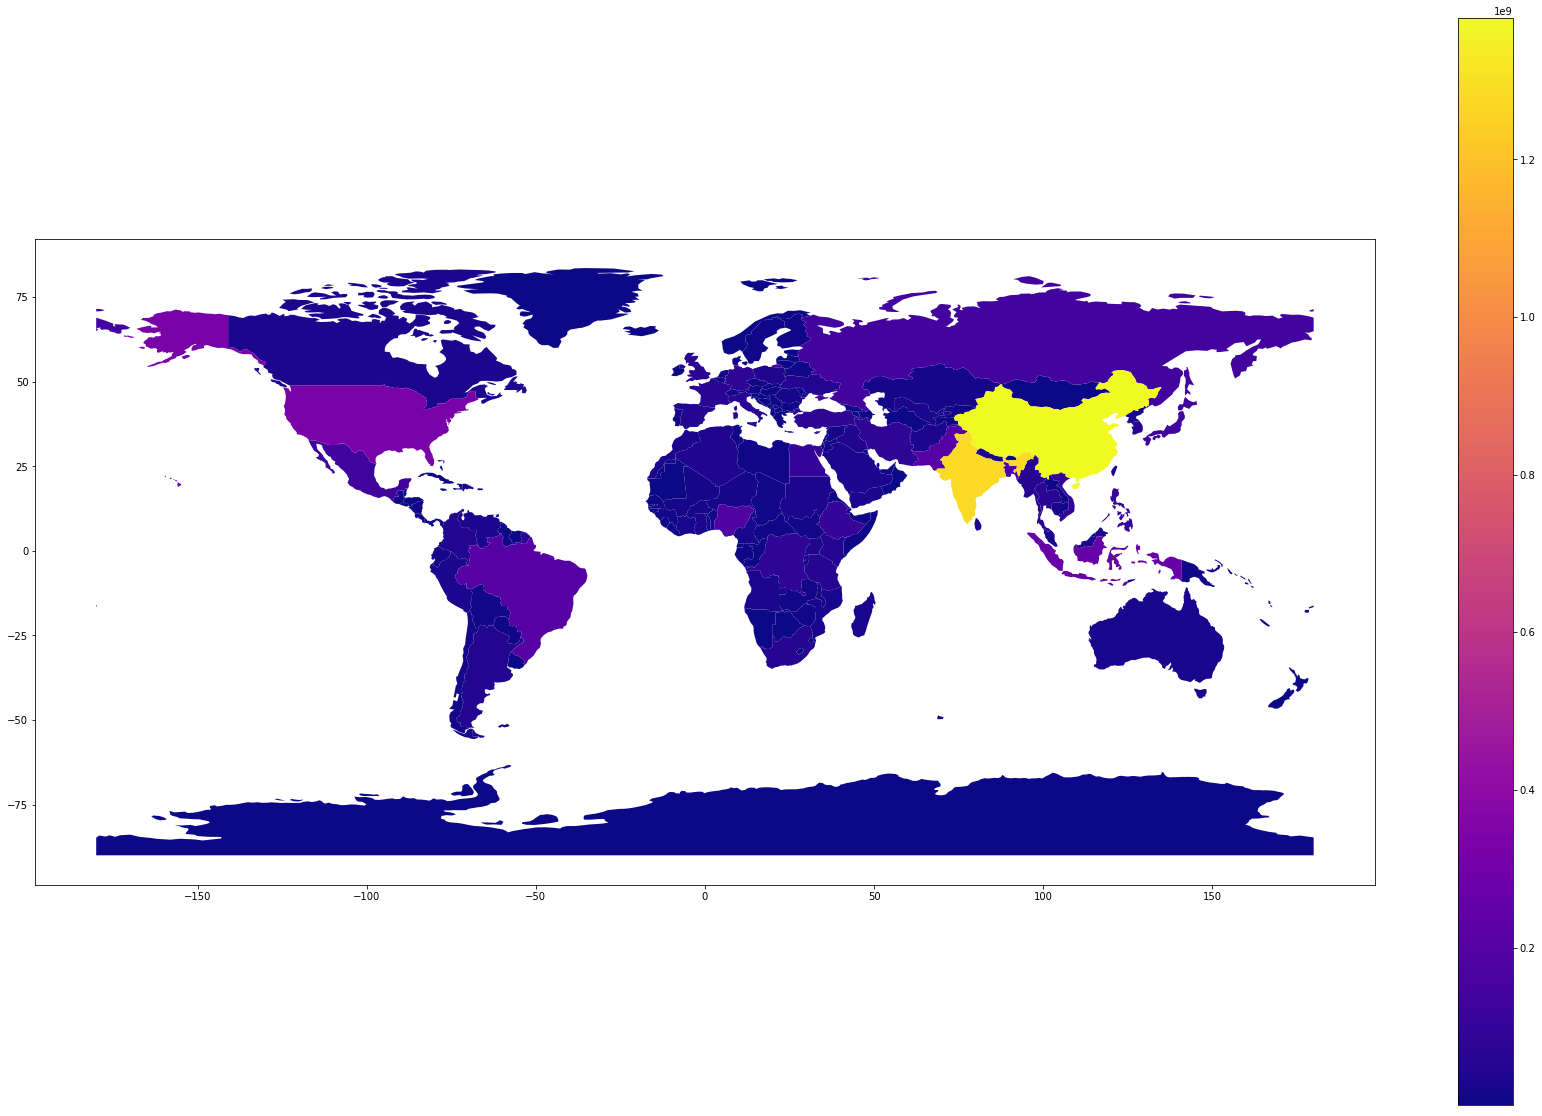

In [12]:
countries.sort_values('pop_est').plot('pop_est', cmap='plasma', figsize=(30, 20), legend=True)

Clustering GDP:

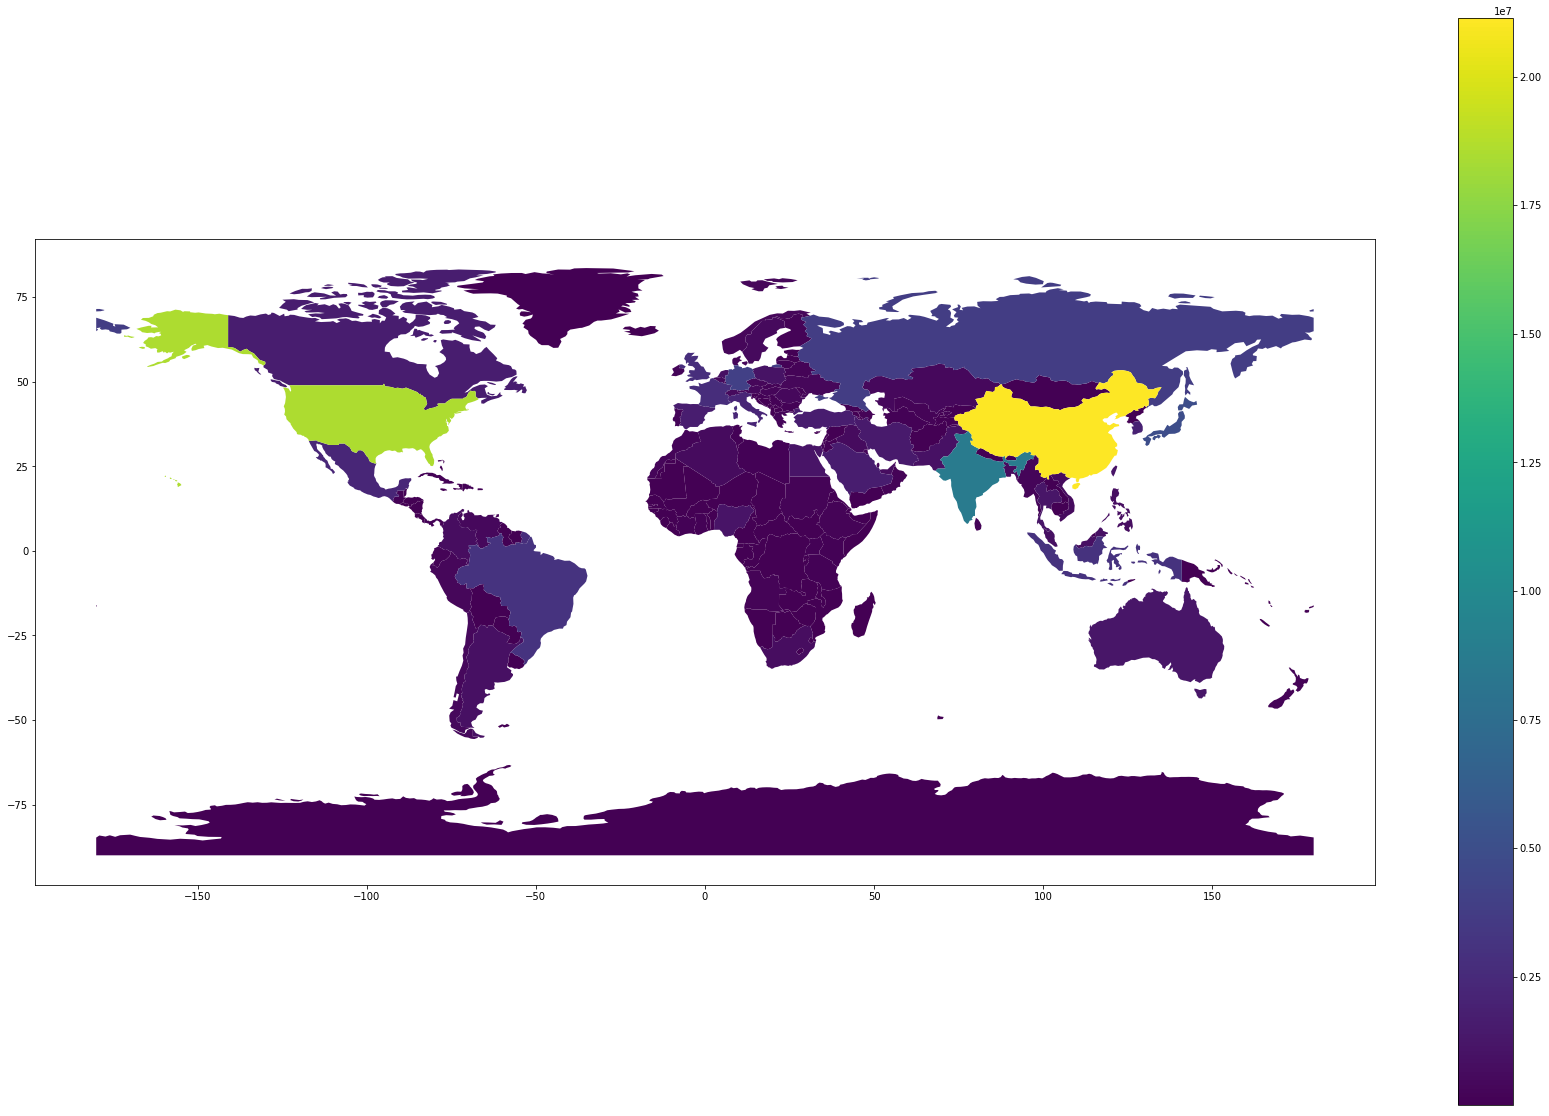

In [13]:
countries.sort_values('gdp_md_est').plot('gdp_md_est', cmap='viridis', figsize=(30, 20),legend=True)

In [23]:
africa=countries[countries['continent']=='Africa']
africa['name'] #51 countries

1            Angola
11          Burundi
13            Benin
14     Burkina Faso
25         Botswana
           ...     
164        Tanzania
165          Uganda
174    South Africa
175          Zambia
176        Zimbabwe
Name: name, Length: 51, dtype: object

Sorting countries by overall GDP:

iso_a3                                                      EGY
name                                                      Egypt
continent                                                Africa
pop_est                                             9.70411e+07
gdp_md_est                                            1.105e+06
geometry      POLYGON ((36.86622999999997 22, 32.89999999999...
Name: 47, dtype: object


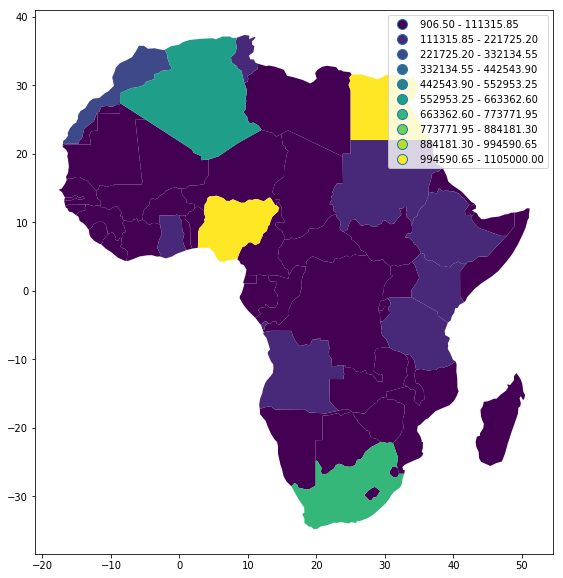

In [39]:
africa=countries[countries['continent']=='Africa']
africa.sort_values('gdp_md_est').plot('gdp_md_est', cmap='viridis',scheme='equal_interval', k=10, figsize=(15, 10),legend=True)
print(africa.loc[africa['gdp_md_est'].idxmax()]) # Egypt with highest overall gdp

Manipulating dataframe to calculate gdp/capita:

In [77]:
africa['gdp/pop'] = (africa.gdp_md_est / africa.pop_est)

C:\Users\thoma\Anaconda3\envs\gmaps\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
africa

,iso_a3,name,continent,pop_est,gdp_md_est,geometry,gdppop,gdp/pop
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...,0.006448,0.006448
11,BDI,Burundi,Africa,11466756.0,7892.0,POLYGON ((29.33999759290035 -4.499983412294092...,0.000688,0.000688
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.691701694356254 6.258817246928629,...",0.002202,0.002202
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.154473504249921 11.94015005131334,...",0.001641,0.001641
25,BWA,Botswana,Africa,2214858.0,35900.0,POLYGON ((29.43218834810904 -22.09131275806759...,0.016209,0.016209
...,...,...,...,...,...,...,...,...
164,TZA,Tanzania,Africa,53950935.0,150600.0,POLYGON ((29.33999759290035 -4.499983412294092...,0.002791,0.002791
165,UGA,Uganda,Africa,39570125.0,84930.0,POLYGON ((29.57946618014088 -1.341313164885626...,0.002146,0.002146
174,ZAF,South Africa,Africa,54841552.0,739100.0,POLYGON ((19.89576785653443 -24.76779021576059...,0.013477,0.013477
175,ZMB,Zambia,Africa,15972000.0,65170.0,POLYGON ((23.21504845550606 -17.52311614346598...,0.004080,0.004080


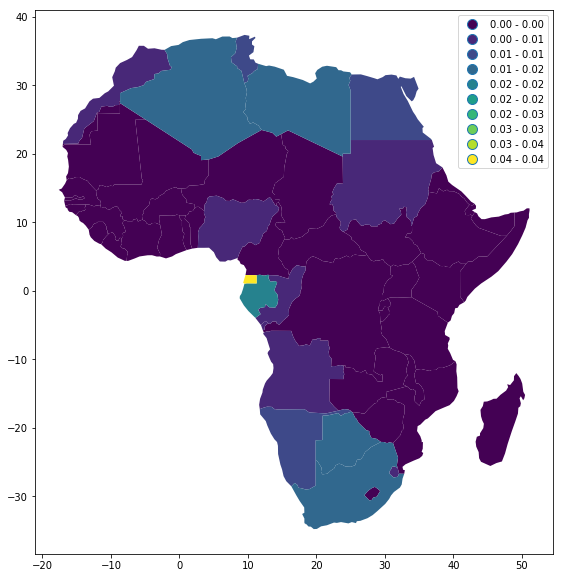

In [79]:
africa.sort_values('gdp/pop').plot('gdp/pop', cmap='viridis',scheme='equal_interval', k=10, figsize=(15, 10),legend=True)

filter country with highest gdp per capita:

In [81]:
africa.loc[africa['gdp/pop'].idxmax()]

iso_a3                                                      GNQ
name                                                 Eq. Guinea
continent                                                Africa
pop_est                                                  778358
gdp_md_est                                                31770
geometry      POLYGON ((9.649158155972628 2.283866075037736,...
gdppop                                                0.0408167
gdp/pop                                               0.0408167
Name: 63, dtype: object

In [82]:
africa

,iso_a3,name,continent,pop_est,gdp_md_est,geometry,gdppop,gdp/pop
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...,0.006448,0.006448
11,BDI,Burundi,Africa,11466756.0,7892.0,POLYGON ((29.33999759290035 -4.499983412294092...,0.000688,0.000688
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.691701694356254 6.258817246928629,...",0.002202,0.002202
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.154473504249921 11.94015005131334,...",0.001641,0.001641
25,BWA,Botswana,Africa,2214858.0,35900.0,POLYGON ((29.43218834810904 -22.09131275806759...,0.016209,0.016209
...,...,...,...,...,...,...,...,...
164,TZA,Tanzania,Africa,53950935.0,150600.0,POLYGON ((29.33999759290035 -4.499983412294092...,0.002791,0.002791
165,UGA,Uganda,Africa,39570125.0,84930.0,POLYGON ((29.57946618014088 -1.341313164885626...,0.002146,0.002146
174,ZAF,South Africa,Africa,54841552.0,739100.0,POLYGON ((19.89576785653443 -24.76779021576059...,0.013477,0.013477
175,ZMB,Zambia,Africa,15972000.0,65170.0,POLYGON ((23.21504845550606 -17.52311614346598...,0.004080,0.004080


agglomorative clustering:

In [83]:
import sklearn.cluster as skc


In [84]:
africa

,iso_a3,name,continent,pop_est,gdp_md_est,geometry,gdppop,gdp/pop
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...,0.006448,0.006448
11,BDI,Burundi,Africa,11466756.0,7892.0,POLYGON ((29.33999759290035 -4.499983412294092...,0.000688,0.000688
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.691701694356254 6.258817246928629,...",0.002202,0.002202
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.154473504249921 11.94015005131334,...",0.001641,0.001641
25,BWA,Botswana,Africa,2214858.0,35900.0,POLYGON ((29.43218834810904 -22.09131275806759...,0.016209,0.016209
...,...,...,...,...,...,...,...,...
164,TZA,Tanzania,Africa,53950935.0,150600.0,POLYGON ((29.33999759290035 -4.499983412294092...,0.002791,0.002791
165,UGA,Uganda,Africa,39570125.0,84930.0,POLYGON ((29.57946618014088 -1.341313164885626...,0.002146,0.002146
174,ZAF,South Africa,Africa,54841552.0,739100.0,POLYGON ((19.89576785653443 -24.76779021576059...,0.013477,0.013477
175,ZMB,Zambia,Africa,15972000.0,65170.0,POLYGON ((23.21504845550606 -17.52311614346598...,0.004080,0.004080


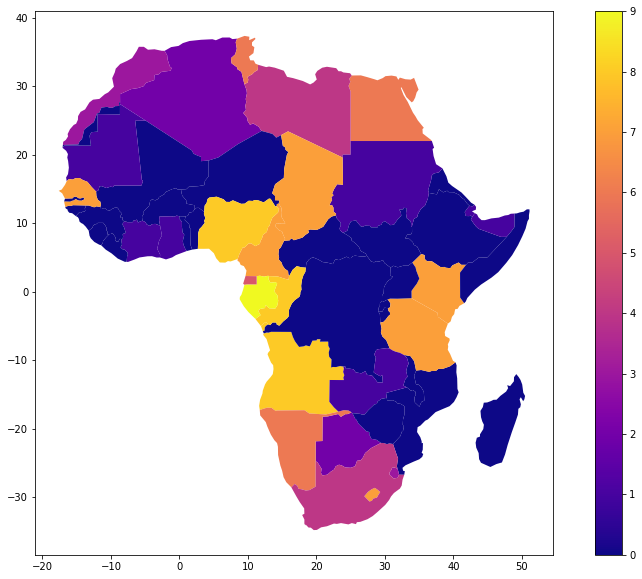

In [85]:
from sklearn.cluster import AgglomerativeClustering
africa_gdpclusters = AgglomerativeClustering(n_clusters=10).fit(africa[['gdp/pop']])
africa.assign(labels=africa_gdpclusters.labels_).plot('labels', cmap='plasma', figsize=(15, 10), legend=True)

Kmeans clustering:

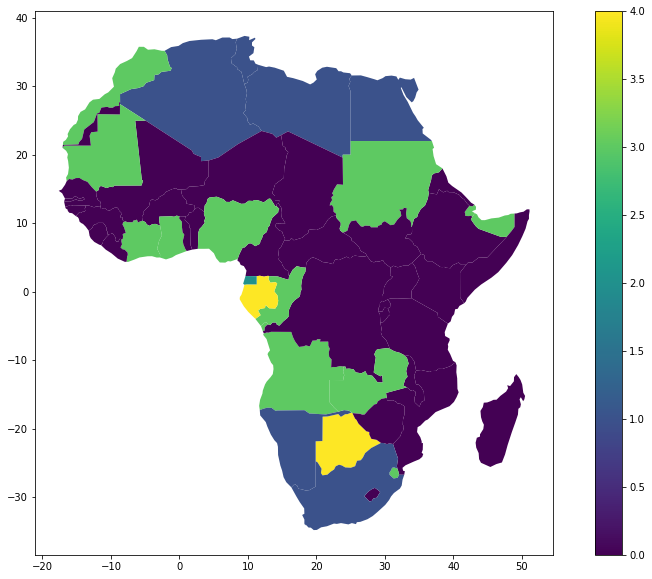

In [90]:
from sklearn.cluster import KMeans 
africa_gdpclusters2 = KMeans(n_clusters=5).fit(africa[['gdp/pop']])
africa.assign(labels=africa_gdpclusters2.labels_).plot('labels', cmap='viridis', figsize=(15, 10), legend=True)